In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import the necessary submodules

In [ ]:
import georges
import georges.fermi
import georges.plotting

# Initialize the materials database
db = georges.fermi.MaterialsDB()

# Range-energy computations

In [17]:
# Use the `kinematics` function of the physics module for relativistic computations
k = georges.physics.kinematics(gamma=30)
k

{'beta': 0.99944429003766333,
 'brho': 93.839959762355576,
 'energy': 27209.8903577,
 'gamma': 30,
 'momentum': 28132.520224711174,
 'range': 51200.164320193369}

In [25]:
# Obtain the range at a given energy
print(
    georges.fermi.get_range_from_energy(material='water',
                                        energy=70,
                                        db=db)
)
print(
    georges.fermi.get_range_from_energy(material='graphite',
                                        energy=150,
                                        db=db)
)

4.075
10.3647058824


In [26]:
# Obtain the energy required to reach a given range
georges.fermi.get_energy_from_range(material='water',
                                    r=32.5,
                                    db=db
                                    )

228.28221726105264

In [28]:
# Compute the residual energy
georges.fermi.residual_energy(material='graphite', thickness=1, k_in=50, db=db)

26.426206488249324

# Fermi-Eyges transport theory

In [27]:
georges.fermi.compute_fermi_eyges(material='graphite', 
                                  energy=228.15, 
                                  thickness=18.5, 
                                  db=db, 
                                  T=georges.fermi.DifferentialMoliere)

{'A': [0.0018968072029195413, 0.011444299118470834, 0.11685416614740143],
 'B': 9.067784172651555e-05,
 'DPP': 0.0,
 'E_R': 72.644916940748118}

In [29]:
# Define a scaterring beamline
bl = georges.Beamline([
    {
        'NAME': 'shifter',
        'AT_ENTRY': 0.0,
        'TYPE': 'slab',
        'MATERIAL': 'beryllium',
        'LENGTH': 0.05,
    },
    {
        'NAME': 'scatterer',
        'AT_ENTRY': 0.5,
        'TYPE': 'slab',
        'MATERIAL': 'graphite',
        'LENGTH': 0.1,
    },
    {
        'NAME': 'scatterer2',
        'AT_ENTRY': 0.75,
        'TYPE': 'slab',
        'MATERIAL': 'water',
        'LENGTH': 0.01,
    },
    {
        'NAME': 'isocenter',
        'AT_ENTRY': 1.0,
        'TYPE': 'mp'
    }
], name="NOZZLE")
bl.line

,AT_ENTRY,LENGTH,MATERIAL,TYPE,CLASS,AT_CENTER,AT_EXIT,ORBIT_LENGTH
NAME,,,,,,,,
shifter,0.00,0.05,beryllium,slab,slab,0.025,0.05,0.05
scatterer,0.50,0.10,graphite,slab,slab,0.550,0.60,0.10
scatterer2,0.75,0.01,water,slab,slab,0.755,0.76,0.01
isocenter,1.00,0.00,NaN,mp,mp,1.000,1.00,0.00


In [30]:
# Transport through a scattering beamline
pbs = georges.fermi.propagate(
                        line=bl, 
                        db=db,
                        beam={
                            'energy': 230,
                            'A0': 0,
                            'A1': 0,
                            'A2': 0,
                        },
                        gaps='air'
                )
pbs.line[['MATERIAL', 'A0', 'A0_IN', 'A0_OUT', 'A1', 'A1_IN', 'A1_OUT', 'B', 'B_IN', 'B_OUT']]

,MATERIAL,A0,A0_IN,A0_OUT,A1,A1_IN,A1_OUT,B,B_IN,B_OUT
NAME,,,,,,,,,,
shifter,beryllium,0.000142,0.000000,0.000142,0.000327,0.000000,0.000327,4.070804e-08,0.000000e+00,4.070804e-08
shifter_scatterer_gap,air,7.504344,0.000142,7.504487,157.867392,0.000327,157.867783,8.973075e+03,4.070804e-08,8.973605e+03
scatterer,graphite,0.000825,7.504487,7.505311,0.003356,157.867783,158.621588,5.343771e-06,8.973605e+03,8.976443e+03
scatterer_scatterer2_gap,air,5.877921,7.505311,13.383233,40.788803,158.621588,200.536187,6.048080e+02,8.976443e+03,2.646197e+04
scatterer2,water,0.000664,13.383233,13.383897,0.000311,200.536187,200.670331,3.528328e-08,2.646197e+04,2.646515e+04
scatterer2_isocenter_gap,air,11.309460,13.383897,24.693356,126.218788,200.670331,330.101254,5.765277e+03,2.646515e+04,6.392737e+04
isocenter,NaN,0.000000,24.693356,24.693356,0.000000,330.101254,330.101254,0.000000e+00,6.392737e+04,6.392737e+04


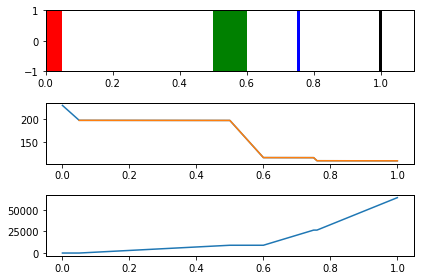

In [32]:
# Plot a scattering beamline
# Plot the energy loss
# Plot the emittance increase
fig = plt.figure()
ax = fig.add_subplot(311)
ax.set_xlim([0,1.1])
ax.set_ylim([-1,1])
georges.plotting.scattering(ax, pbs)
ax2 = fig.add_subplot(312)
ax2.plot(pbs.line['AT_ENTRY'], pbs.line['ENERGY_IN'])
ax2.plot(pbs.line['AT_EXIT'], pbs.line['ENERGY_OUT'])
ax.set_xlim([0,1.1])
ax3 = fig.add_subplot(313)
ax3.plot(pbs.line['AT_ENTRY'], pbs.line['B_IN'])
plt.tight_layout()